In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Dabut6412/Forecast-IA/refs/heads/main/Forecast%20CNN/datos_forecastB5.csv")
df.fechas = pd.to_datetime(df.fechas, format='%d/%m/%Y')
df = df.set_index('fechas')
df.index.freq = pd.infer_freq(df.index)
df.head(10)

,demanda
fechas,
2021-10-01,517
2021-11-01,536
2021-12-01,575
2022-01-01,568
2022-02-01,614
2022-03-01,453
2022-04-01,572
2022-05-01,602
2022-06-01,669


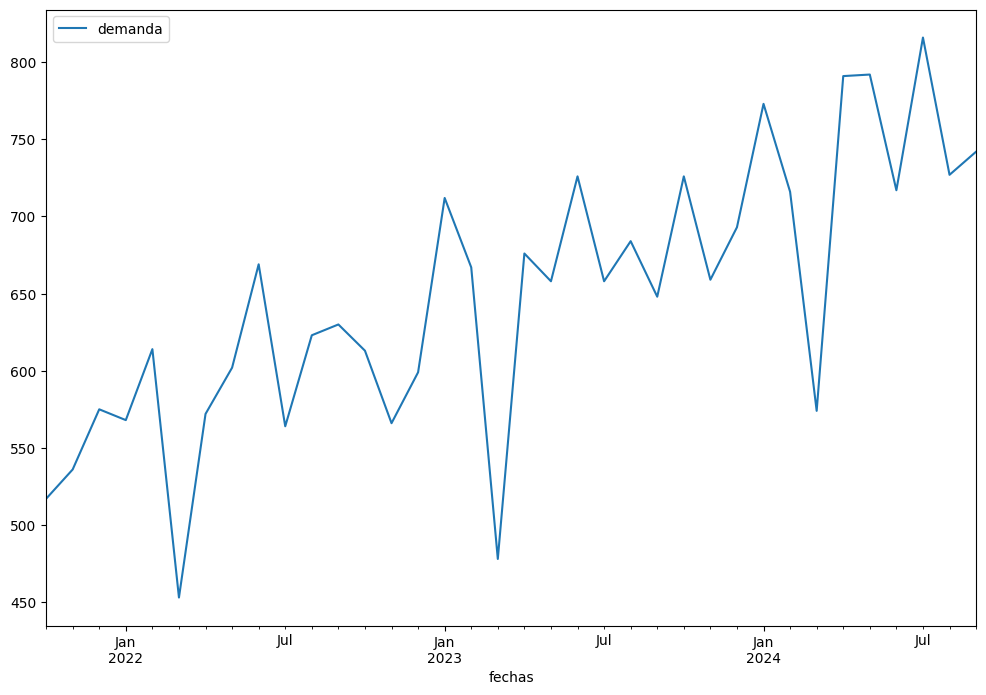

In [ ]:
df.plot(figsize=(12,8))
plt.show()

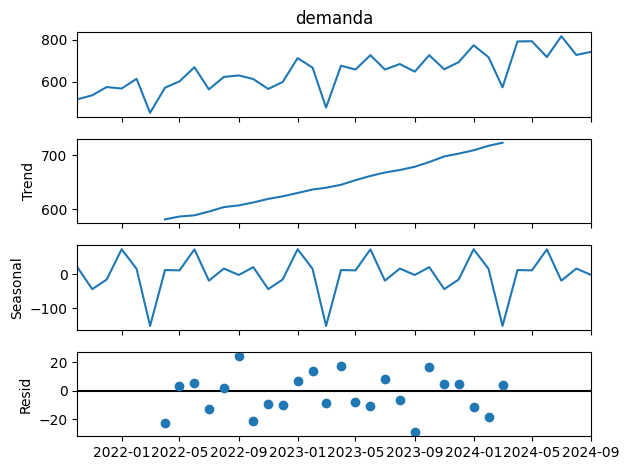

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['demanda'])
results.plot();


In [ ]:
len(df)

36

In [ ]:
train = df.iloc[:32]
test = df.iloc[32:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df.head(),df.tail()

(            demanda
 fechas             
 2021-10-01      517
 2021-11-01      536
 2021-12-01      575
 2022-01-01      568
 2022-02-01      614,
             demanda
 fechas             
 2024-05-01      792
 2024-06-01      717
 2024-07-01      816
 2024-08-01      727
 2024-09-01      742)

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.18879056],
       [0.24483776],
       [0.35988201],
       [0.33923304],
       [0.47492625],
       [0.        ],
       [0.35103245],
       [0.43952802],
       [0.63716814],
       [0.32743363]])

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
n_input = 6
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')


Given the Array: 
[0.18879056 0.24483776 0.35988201 0.33923304 0.47492625 0.        ]
Predict this y: 
 [[0.35103245]]


In [ ]:
X.shape


(1, 6, 1)

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# fit model
model.fit(generator,epochs=35)

Epoch 1/35
17/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2343

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2281
Epoch 2/35
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0478
Epoch 3/35
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0255
Epoch 4/35
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0256
Epoch 5/35
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0371
Epoch 6/35
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0303
Epoch 7/35
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0304
Epoch 8/35
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0316
Epoch 9/35
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0276
Epoch 10/35
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0338
Epoch 11/35
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0346
Epoch 12/35
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0390
Epoch 13/35
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0605
Epoch 14/35
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0178
Epoch 15/35
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0553
Epoch 16/35
26/26 ━━━━━━━

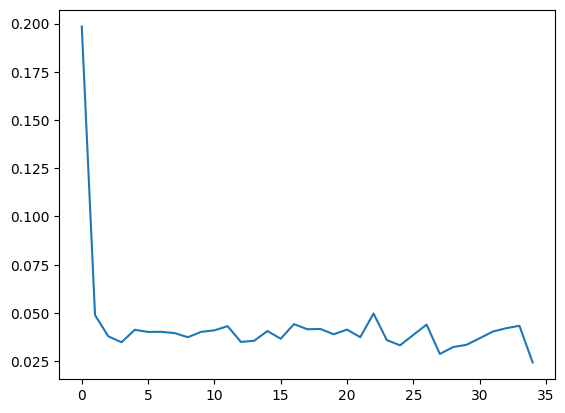

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-6:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


array([[0.73165864]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.77876106])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
test_predictions

[array([0.73165864], dtype=float32),
 array([0.7340422], dtype=float32),
 array([0.70697534], dtype=float32),
 array([0.703242], dtype=float32)]

In [ ]:
test.head()

,demanda
fechas,
2024-06-01,717
2024-07-01,816
2024-08-01,727
2024-09-01,742


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['predicciones'] = true_predictions

<ipython-input-29-fe73c52db814>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicciones'] = true_predictions


<Axes: xlabel='fechas'>

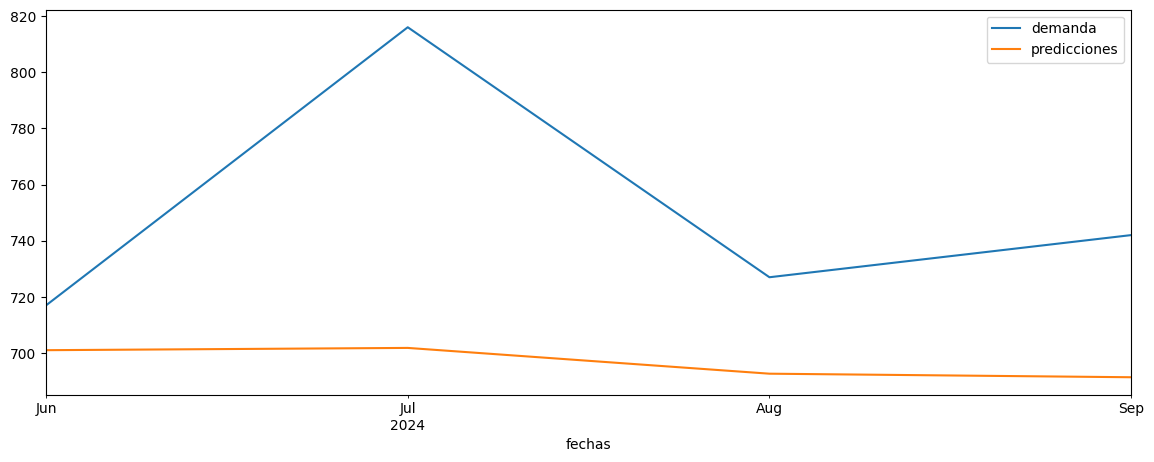

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
test.head(100)

,demanda,predicciones
fechas,,
2024-06-01,717,701.032278
2024-07-01,816,701.840315
2024-08-01,727,692.664641
2024-09-01,742,691.399039


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['demanda'],test['predicciones']))
print(rmse)

65.24334437522322


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

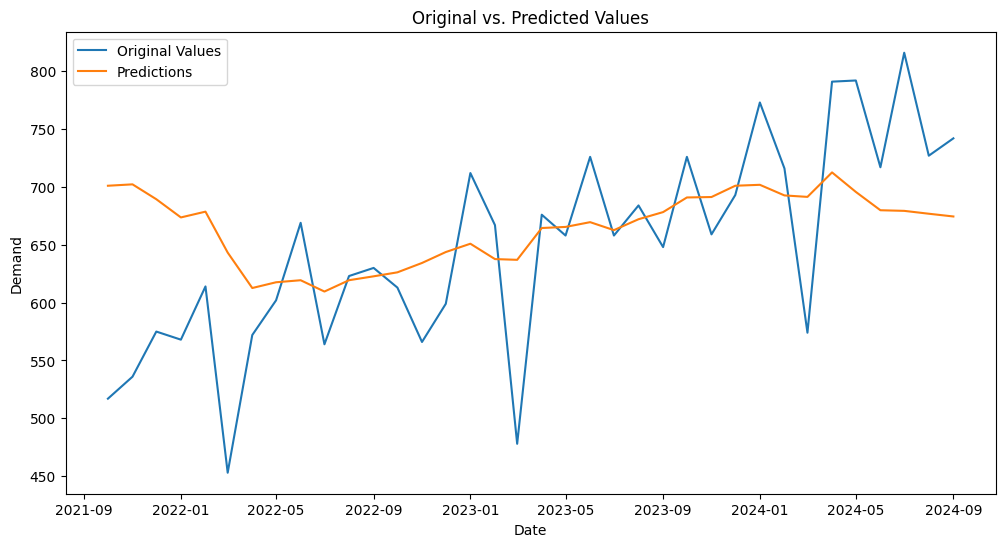

In [ ]:
df_with_predictions = df.copy()

all_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

# Predict for the entire dataframe (34 values)
for i in range(len(df)):
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    all_predictions.append(current_pred)

    # Instead of using predictions, shift the current batch by one step
    # and add the next actual value from scaled data (if available)
    if i + n_input < len(scaled_train):  # Using training data for initial predictions
        current_batch = np.append(current_batch[:, 1:, :], [[scaled_train[i + n_input]]], axis=1)
    else:
        # For predictions beyond the training data, use the last n_input predictions
        current_batch = np.append(current_batch[:, 1:, :], [[all_predictions[-1]]], axis=1)

# Assuming 'all_predictions' contains the scaled predictions
truee_predictions = scaler.inverse_transform(all_predictions)

# Store predictions in the new DataFrame
df_with_predictions['Predictions'] = truee_predictions

# Plot predictions against original values using the new DataFrame
plt.figure(figsize=(12, 6))
plt.plot(df_with_predictions.index, df_with_predictions['demanda'], label='Original Values')
plt.plot(df_with_predictions.index, df_with_predictions['Predictions'], label='Predictions')
plt.legend()
plt.title('Original vs. Predicted Values')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.show()

In [ ]:
df_with_predictions.tail()

,demanda,Predictions
fechas,,
2024-05-01,792,695.706448
2024-06-01,717,679.861468
2024-07-01,816,679.321160
2024-08-01,727,676.844474
2024-09-01,742,674.467685


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(df_with_predictions['demanda'],df_with_predictions['Predictions']))
print(rmse)

81.32407697060752


In [ ]:
#df_with_predictions.to_excel('B5.xlsx', index=False)

In [1]:
import sys
import IPython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error

# Function to print library versions
def print_library_versions():
    libraries = [
        'sys', 'IPython', 'pandas', 'numpy', 'matplotlib', 'statsmodels',
        'sklearn', 'tensorflow', 'keras'
    ]
    for lib in libraries:
        try:
            module = __import__(lib)  # Import the library dynamically
            version = module.__version__
            print(f'{lib} version: {version}')
        except AttributeError:
            print(f'{lib} version: Not found')

# Call the function to print the library versions
print_library_versions()

sys version: Not found
IPython version: 7.34.0
pandas version: 2.2.2
numpy version: 1.26.4
matplotlib version: 3.8.0
statsmodels version: 0.14.4
sklearn version: 1.5.2
tensorflow version: 2.17.1
keras version: 3.5.0
